# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from requests.exceptions import HTTPError

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/Users/Jenni/UNCCDABC/Homeworks/python-api-challenge/WeatherPy/OutputData/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_data_list = []


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")

for num, city in enumerate(cities, start=1):    
    response = requests.get(query_url + city)
    if response:
        print(f"Processing Record number {num}, city: {city}")
        # print(type(response.json()))
        js = response.json()
        data = {}
        data['City'] = js['name']
        data['Country'] = js['sys']['country']
        data['Cloudiness'] = js['clouds']['all']
        data['Date'] = js['dt']
        data['Humidity'] = js['main']['humidity']
        data['Latitude'] = js['coord']['lat']
        data['Longitude'] = js['coord']['lon']
        data['Max Temp'] = js['main']['temp_max']
        data['Wind Speed'] = js['wind']['speed']
        city_data_list.append([data['City'], data['Country'], data['Cloudiness'],
                            data['Date'], data['Humidity'], data['Latitude'],
                            data['Longitude'], data['Max Temp'],
                            data['Wind Speed']])
        # print(json.dumps(js, indent=4, sort_keys=True))
    else:
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record number 2, city: mitu
Processing Record number 3, city: port elizabeth
Processing Record number 4, city: ilhabela
Processing Record number 5, city: hermanus
City not found. Skipping...
Processing Record number 7, city: ancud
Processing Record number 8, city: jamestown
Processing Record number 9, city: punta arenas
Processing Record number 10, city: albany
Processing Record number 11, city: inirida
Processing Record number 12, city: ushuaia
Processing Record number 13, city: bethel
Processing Record number 14, city: half moon bay
Processing Record number 15, city: ostrovnoy
Processing Record number 16, city: kodiak
Processing Record number 17, city: juneau
Processing Record number 18, city: barrow
Processing Record number 19, city: chokurdakh
Processing Record number 20, city: bambous virieux
Processing Record number 21, city: esperance
Processing Record number 22, city: hilo
Processing R

Processing Record number 190, city: mulanje
Processing Record number 191, city: oussouye
Processing Record number 192, city: luau
Processing Record number 193, city: bartica
Processing Record number 194, city: nioro
City not found. Skipping...
Processing Record number 196, city: hearst
Processing Record number 197, city: erenhot
Processing Record number 198, city: pedasi
Processing Record number 199, city: jiazi
Processing Record number 200, city: kichera
Processing Record number 201, city: hithadhoo
Processing Record number 202, city: cape coast
Processing Record number 203, city: marrakesh
Processing Record number 204, city: petropavlovsk-kamchatskiy
Processing Record number 205, city: povenets
City not found. Skipping...
Processing Record number 207, city: maracas
Processing Record number 208, city: srednekolymsk
Processing Record number 209, city: dunedin
City not found. Skipping...
Processing Record number 211, city: westport
Processing Record number 212, city: bubaque
Processing 

Processing Record number 380, city: lasa
Processing Record number 381, city: san quintin
Processing Record number 382, city: acapulco
Processing Record number 383, city: cody
Processing Record number 384, city: santa marta
Processing Record number 385, city: portland
City not found. Skipping...
Processing Record number 387, city: mongo
Processing Record number 388, city: palmer
Processing Record number 389, city: san cristobal
Processing Record number 390, city: fougamou
Processing Record number 391, city: agirish
Processing Record number 392, city: chapais
Processing Record number 393, city: kandrian
City not found. Skipping...
Processing Record number 395, city: atasu
Processing Record number 396, city: coahuayana
Processing Record number 397, city: honningsvag
City not found. Skipping...
Processing Record number 399, city: pitimbu
Processing Record number 400, city: roma
Processing Record number 401, city: kruisfontein
City not found. Skipping...
Processing Record number 403, city: 

Processing Record number 568, city: estevan
City not found. Skipping...
Processing Record number 570, city: avera
Processing Record number 571, city: mareeba
Processing Record number 572, city: makakilo city
Processing Record number 573, city: buenaventura
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record number 577, city: hun
Processing Record number 578, city: teya
Processing Record number 579, city: belfast
Processing Record number 580, city: meulaboh
Processing Record number 581, city: talas
Processing Record number 582, city: narsaq
Processing Record number 583, city: kindu
Processing Record number 584, city: ambon
Processing Record number 585, city: bonthe
Processing Record number 586, city: port hedland


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Conver raw data to DataFrame
city_data_df = pd.DataFrame(city_data_list, columns=data.keys())
city_data_df.count()

City          520
Country       520
Cloudiness    520
Date          520
Humidity      520
Latitude      520
Longitude     520
Max Temp      520
Wind Speed    520
dtype: int64

In [5]:
# Export the city data into a.csv.
city_data_df.to_csv(output_data_file, index=False)

# Display a preview of the DataFrame
city_data_df.head()

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Mitu,IR,17,1571873426,80,36.20,46.09,46.80,3.96
1,Port Elizabeth,US,1,1571873427,62,39.31,-74.98,62.01,4.70
2,Ilhabela,BR,81,1571873427,79,-23.78,-45.36,72.41,16.28
3,Hermanus,ZA,100,1571873427,82,-34.42,19.24,57.00,3.00
4,Ancud,CL,21,1571873427,71,-41.87,-73.83,55.40,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

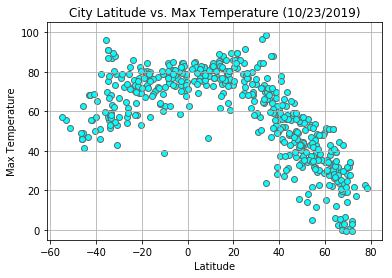

In [6]:
# Build a scatter plot for Latitude vs Temperature.
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'], c='cyan',
            marker='o', edgecolors='dimgray')

# Incorporate the other graph properties
plt.ylim(-5, 105)
plt.title('City Latitude vs. Max Temperature (10/23/2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(True)

# Save the figure as .png.
plt.savefig('C:/Users/Jenni/UNCCDABC/Homeworks/python-api-challenge/WeatherPy/Images/Latitude-MaxTemp.png')

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

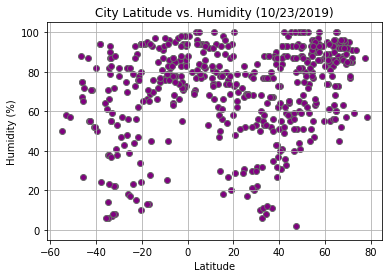

In [7]:
# Build a scatter plot for Latitude vs Humidity.
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], c='purple',
            marker='o', edgecolors='dimgray')

# Incorporate the other graph properties
plt.ylim(-5, 105)
plt.title('City Latitude vs. Humidity (10/23/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure as .png.
plt.savefig('C:/Users/Jenni/UNCCDABC/Homeworks/python-api-challenge/WeatherPy/Images/Latitude-Humidity.png')

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

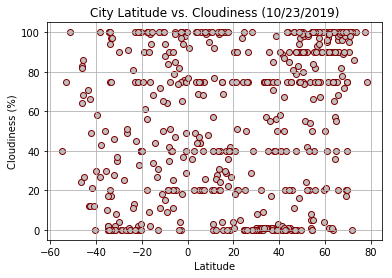

In [8]:
# Build a scatter plot for Latitude vs Cloudiness.
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], c='silver',
            marker='o', edgecolors='maroon')

# Incorporate the other graph properties
plt.ylim(-5, 105)
plt.title('City Latitude vs. Cloudiness (10/23/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure as .png.
plt.savefig('C:/Users/Jenni/UNCCDABC/Homeworks/python-api-challenge/WeatherPy/Images/Latitude-Cloudiness.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

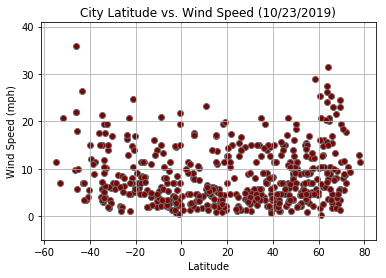

In [9]:
# Build a scatter plot for Latitude vs Wind Speed.
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], c='maroon',
            marker='o', edgecolors='dimgray')

# Incorporate the other graph properties
plt.ylim(-5, max(city_data_df['Wind Speed'])+5)
plt.title('City Latitude vs. Wind Speed (10/23/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure as .png.
plt.savefig('C:/Users/Jenni/UNCCDABC/Homeworks/python-api-challenge/WeatherPy/Images/Latitude-Wind Speed.png')

# Show plot
plt.show()